<div>
    <img src="exo.png" style="margin:50px;float: left;"/>
</div>

<div>
    <img src="Fastest Gradient Descent.png" style="margin:50px;float: left;"/>
</div>

In [2]:
from mpl_toolkits import mplot3d

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [89]:
def f(x,y):
    return x**2 - 2*x*y + 6*y**2+ x-y

In [90]:
f(-1,-2)

22

In [6]:
xx = np.linspace(-3,3,100)
yy = np.linspace(-1,1,100)
X, Y = np.meshgrid(xx, yy)
zz = f(X,Y)

C:\Users\patat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'color'
  after removing the cwd from sys.path.


Text(0.5, 0, 'f')

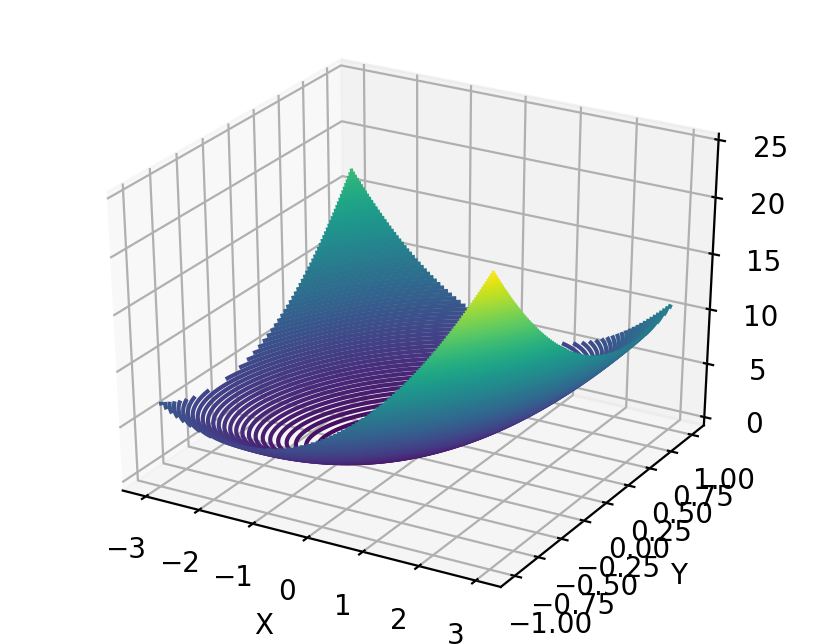

In [7]:
fig = plt.figure(figsize=(5,4),dpi=200)
ax = plt.axes(projection='3d')

ax.contour3D(X,Y,zz,100,color="Green")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

Text(0.5, 0, 'f')

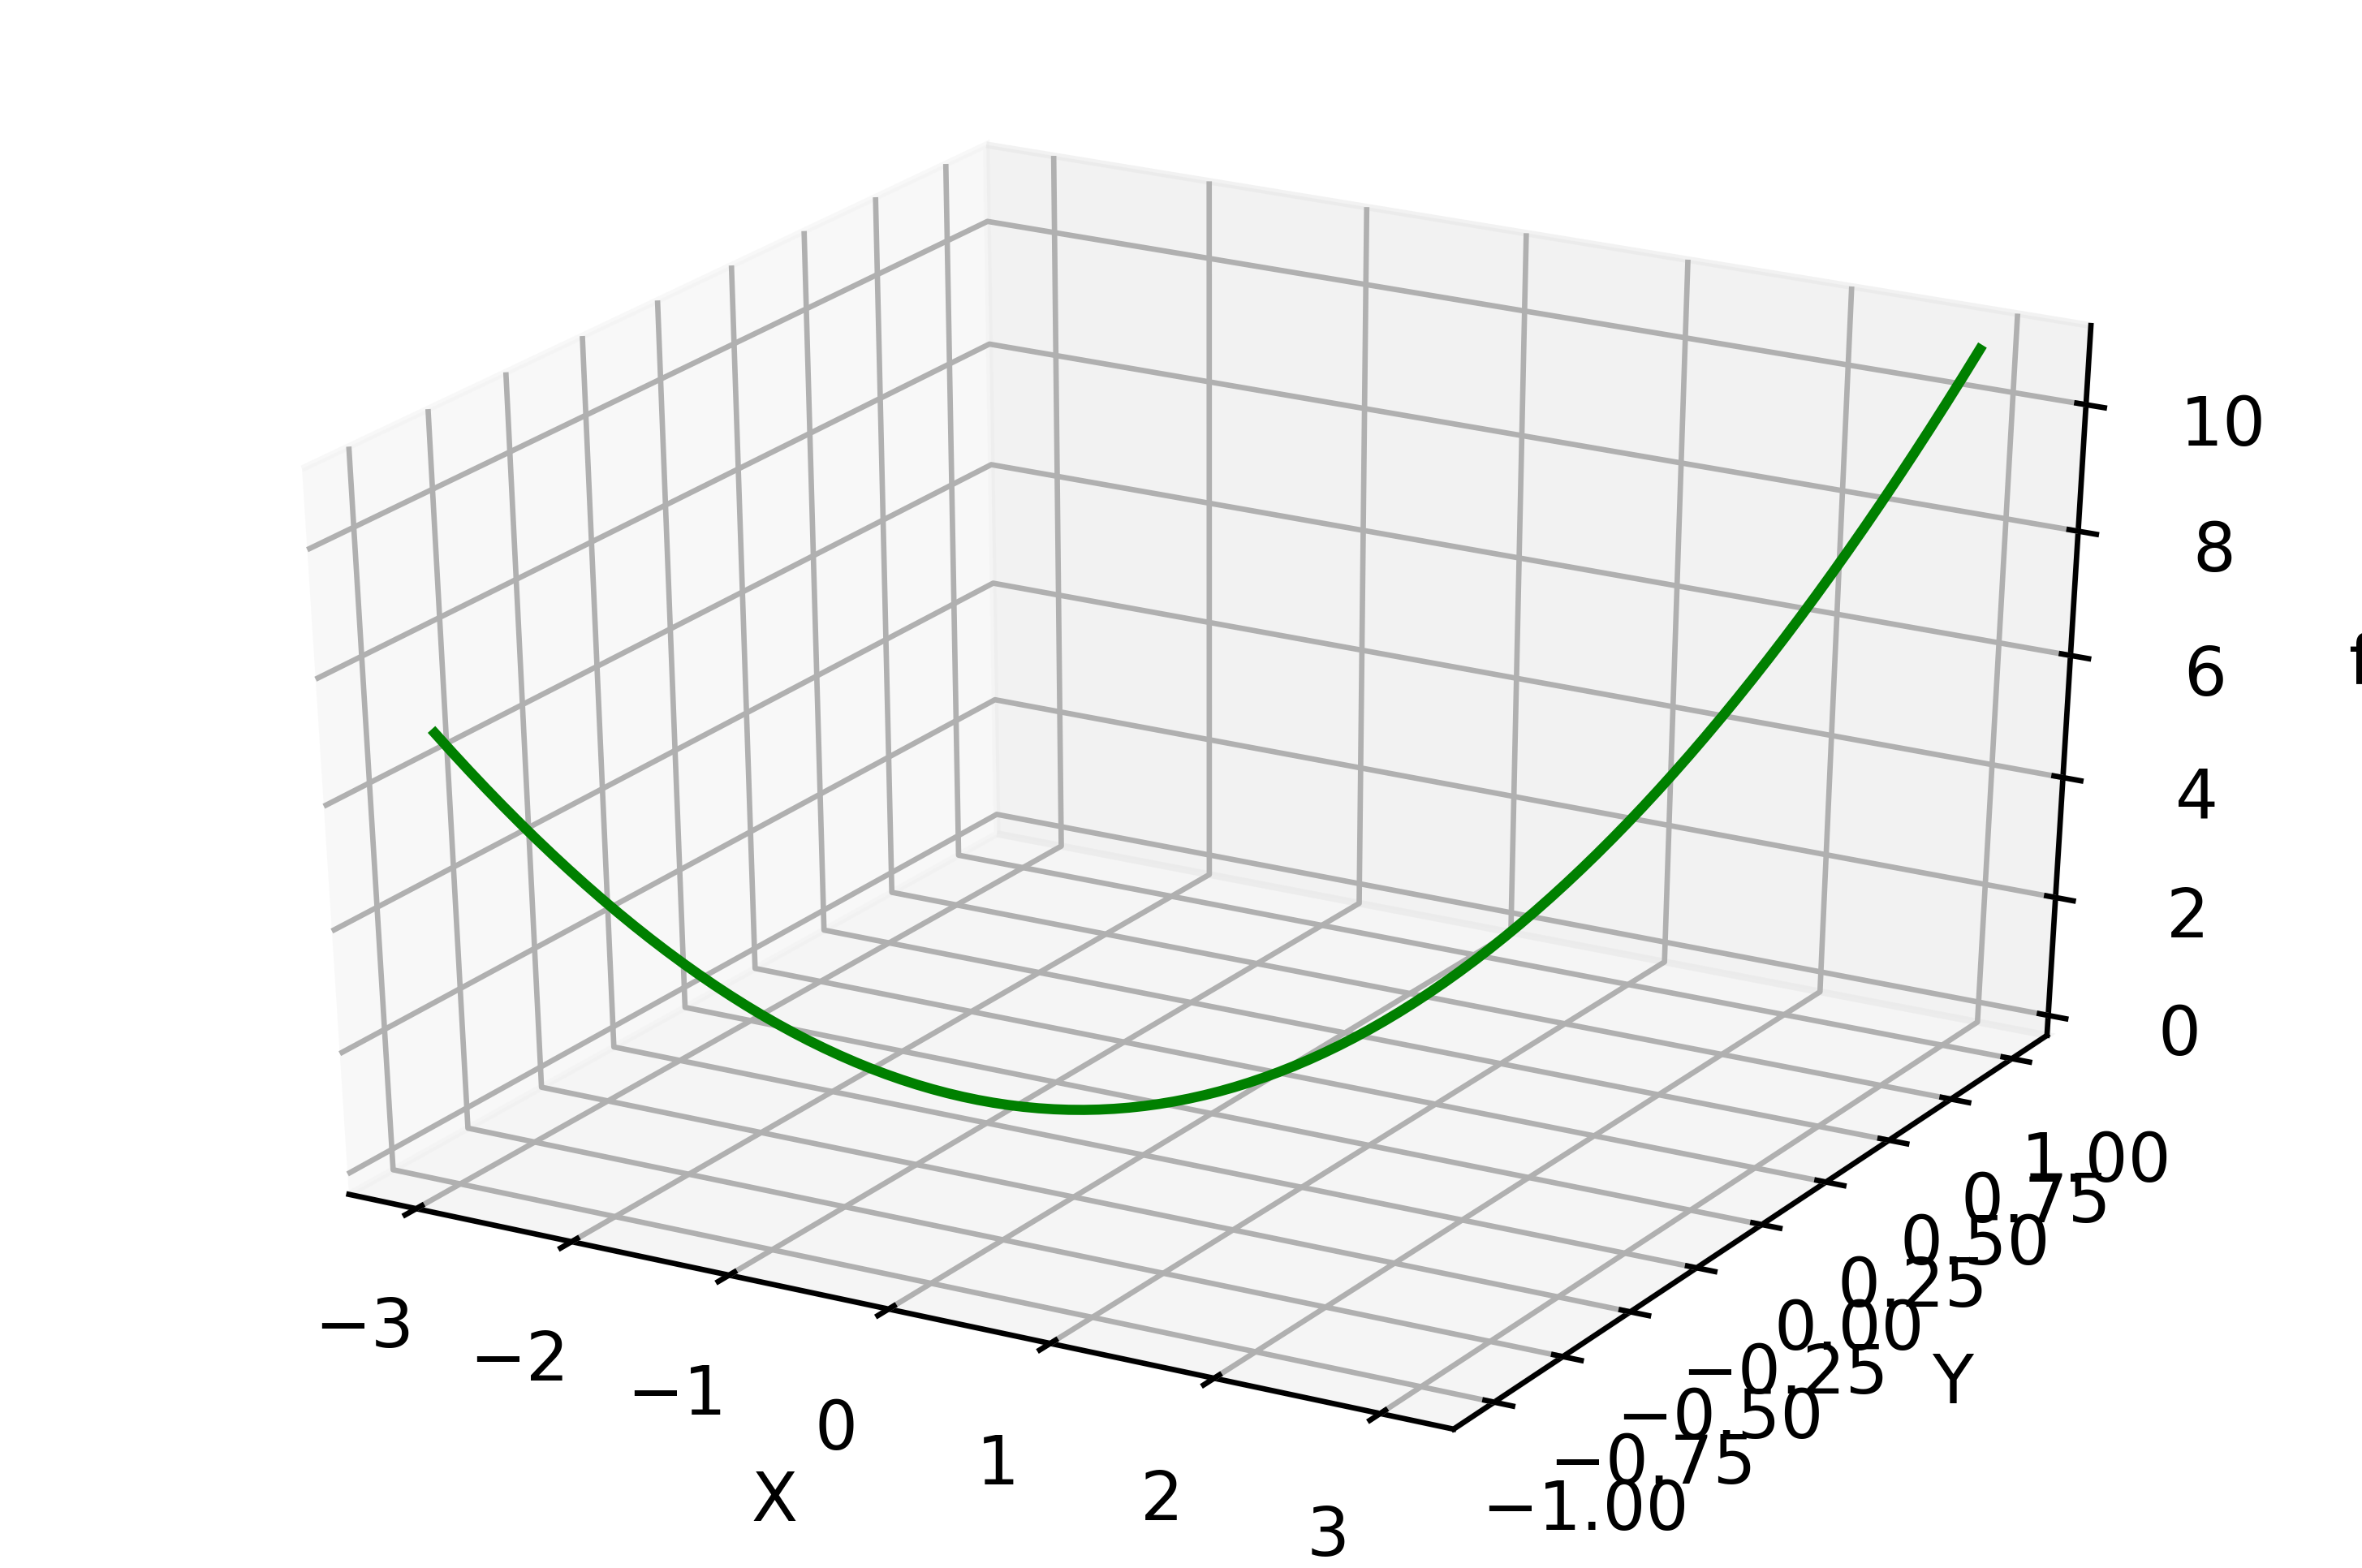

In [8]:
fig = plt.figure(dpi=600)
ax = plt.axes(projection='3d')
ax.plot3D(xx,yy,f(xx,yy),color="Green")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

In [68]:
def grad(f,x):
    h=0.00001
    df1 = (f(x[0]+h,x[1]) - f(x[0],x[1]))/h
    df2 = (f(x[0],x[1]+h) - f(x[0],x[1]))/h
    return np.array([df1,df2])

In [69]:
grad(f,[0,0])

array([ 1.00001, -0.99994])

In [93]:
def fastestGD(f,eps=0.001):
    x = np.array([0,0])
    gradf = grad(f,x)
    
    while np.all(np.abs(gradf) > eps):
        
        alpha = alpha_optimal(function=f, gradient=gradf, point=x)
        
        x = x - alpha*gradf
        
        gradf = grad(f,x)
    return x, f(x[0],x[1])

In [95]:
xmin, fmin = fastestGD(f)

In [98]:
print("xmin = ",xmin," fmin = ",fmin)

xmin =  [-4.99931274e-01 -3.45372795e-04]  fmin =  -0.2499992321106209


Результат прекрасно сходится с аналитическим решением !!!!!! ($x_{min} = -\frac{1}{2}$ и $y_{min} = 0$)

Text(0.5, 0, 'f')

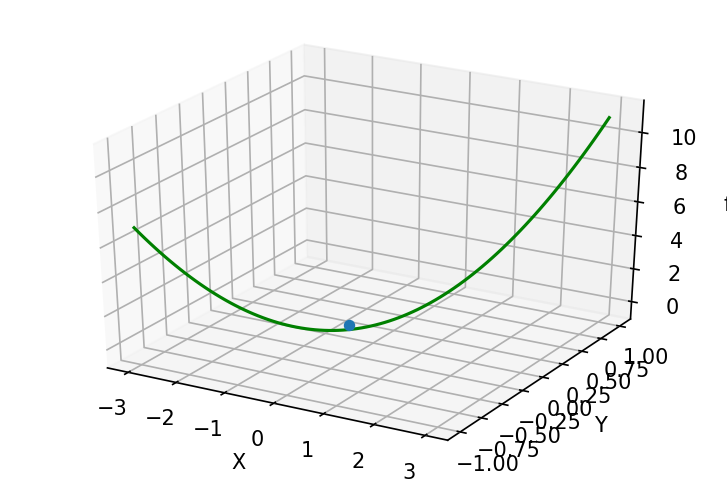

In [97]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.plot3D(xx,yy,f(xx,yy),color="Green")
ax.scatter(xmin[0],xmin[1],fmin)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

In [91]:
# мы находим оптимальный параметр альфа, методом ломанных на интервале (0;1)
def alpha_optimal(function, gradient, point):
    
    def g(alpha): #Функция одномерной оптимизации
        arg =point - alpha*gradient
        return function(arg[0],arg[1])
    
    def dg(alpha):
        h=0.00001
        return (g(alpha+h)-g(alpha))/h
    
    # константа Липшинца
    L = np.max([np.abs(dg(alpha_i)) for alpha_i in np.linspace(0.001,0.999,100)]) + 0.01
    
    # Метод ломанных 
    alpha_optimal , _ = polylines(g,0.001,0.999,0.01,L)
    
    return alpha_optimal

In [62]:
def polylines(f,a,b,eps,L):
    x0 = a
    x1 = b
    x_opt = (f(x0) - f(x1) + L*(x0+x1))/(2*L)
    
    def next_iter(x1,x2):
        next1 = (f(x0) - f(x2) + L*(x0+x2))/(2*L)
        next2 = (f(x2) - f(x1) + L*(x1+x2))/(2*L)
        return next1 if f(next1)<f(next2) else next2
    
    while(np.abs(f(x1) - f(x_opt))>eps):
        x1 = next_iter(x1,x_opt) # We find the next iterative of x1
        x_opt = next_iter(x_opt, x1) # we find a new supposed optimal x_opt with the new x1!!!
    return x_opt, f(x_opt)

### пробная функция на метод ломанных

In [54]:
def myf(x):
    return np.sin(x)

In [59]:
myx = np.linspace(-4,0.5,100)

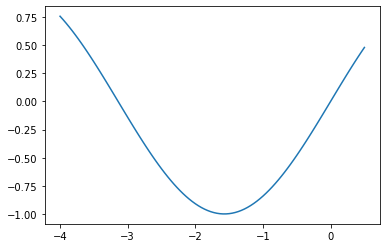

In [60]:
plt.plot(myx,myf(myx))

In [64]:
polylines(myf,(-1)*np.pi,0,0.0001,1)

(-1.6447124446744399, -0.9972694473174303)

In [50]:
def dmyf(alpha):
        h=0.00001
        return (myf(alpha+h)-myf(alpha))/h

In [51]:
np.max(
            np.abs(
                dmyf(np.linspace(-1,1,100))
            )
        ) 

0.999949035718553

# Задача 2

<div>
    <img src="exo.png" style="margin:50px;float: left;"/>
</div>

Для заданного эллипса и заданной точки, найдем минимальное растояние от точки до эллипса 

## Задача на картинках!!

<div>
    <img src="ellipse.png" style="margin:50px;float: left;"/>
</div>

<div>
    <img src="ellipse problem.jpg" style="margin:50px;float: left;"/>
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# ЗАДАЧА 1 : МИНИМАЛЬНОЕ РАССТОЯНИЕ ОТ ТОЧКИ $(x_0, y_0)$ ДО ЭЛЛИПСА С ЦЕНТРОМ В $(0, 0)$

Мы находим точку $(x_1, y_1)$ эллипса, где достигается  минимальное расстояние от точки $(x_0,y_0)$ **МЕТОДОМ ДИХОТОМИИ**

In [2]:
def ellipse_value(a,b,x):
        return b * np.sqrt(1 - (x/a)**2)
def normal_value(a,b,x0,y0,x):
        return ((b**2)*x*y0)/((a**2)*x0 + (b**2 - a**2)*x)
def tangent(a,b,x1,y1,x):
        return (b**2/y1)*(1-x*x1/a**2)

In [3]:
#разбираем случай когда a больше b
def a_notless_than_b(great_a,less_b,x0,y0,eps=1e-6):
    #print("a_notless_than_b") # Метка
    #print(f'b={less_b} a={great_a} x0={x0} y0={y0}') # Метка
    if x0>0:
        if y0>0:
            #print("x0>0 and y0>0")# Метка
            x_begin = 0
            x_end = great_a 
            #print(f'x_begin={x_begin} x_end={x_end}')# Метка
            x_approximation = (x_begin + x_end)/2
            i=1
            while np.abs(x_end-x_begin) > eps:
                ell = ellipse_value(great_a,less_b,x_approximation)
                nor = normal_value(great_a,less_b,x0,y0,x_approximation)

                #print(f"Iteration {i} Ellipse value: {ell} Normal: {nor}")# Метка
                if ell > nor:
                    x_begin = x_approximation
                elif ell < nor:
                    x_end = x_approximation
                else:
                    break
                x_approximation = (x_begin + x_end)/2
                i += 1
        else:
            #print("Through here (y0 = 0)") # Метка
            x_approximation = (x0 * great_a**2)/(great_a**2-less_b**2) if x0 < (great_a**2-less_b**2)/great_a else great_a
    else:
        #print("Or here (x0 = 0)") # Метка
        x_approximation = 0

    return x_approximation, ellipse_value(great_a,less_b,x_approximation)

In [4]:
# В первой четверти плоскости (x0,y0)
def search_in_1st_quarter(a,b,x0,y0):
    #print('search in 1st quarter')
    #print(f'x0 = {x0} y0 = {y0}')
    if(a>=b):
        x1,y1 = a_notless_than_b(a,b,x0,y0)
    else:
        #print(f'b={b} > a={a} x0={x0} y0={y0}')# Метка
        y1,x1 = a_notless_than_b(b,a,y0,x0) #   Если a < b мы чуть чуть поменяем задачу для удобства решения
    return x1,y1

In [5]:
# Рассмотриваем задачу для любой заданной точки на всей плоскости
# Мы используем свойства симметричности эллипса
def search_in_whole_plan(a,b,x0,y0):
    #print('search in whole plan')
    x1,y1 = search_in_1st_quarter(a,b,abs(x0),abs(y0))
    if x0>=0:
        x_approx = x1
        if y0>=0:
            y_approx = y1
        else:
            y_approx = (-1) * y1
    else:
        x_approx = (-1)*x1
        if y0>=0:
            y_approx = y1
        else:
            y_approx = (-1) * y1
    
    return x_approx,y_approx

In [6]:
# Считаем минимальное расстояние
def minimal_distance_to_ellipse(a,b,x0,y0):
    x_approximation, y_approximation = search_in_whole_plan(a,b,x0,y0)  
    minimal_distance = np.sqrt((x0-x_approximation)**2 + (y0-y_approximation)**2)
    
    return minimal_distance

In [7]:
def draw_figure(a,b,x0,y0,plt=plt):
    x1,y1 = search_in_whole_plan(a,b,x0,y0)
    fig,ax = plt.subplots(figsize=(8,8))
    axlim = np.max([a,b,abs(x0),abs(y0)])+0.1
    ax.set_xlim(-axlim,axlim)
    ax.set_ylim(-axlim,axlim)
    
    ell_xx = np.linspace(-a,a,200)
    ax.plot(ell_xx,ellipse_value(a,b,ell_xx),'b-')
    ax.plot(ell_xx,(-1.0)*ellipse_value(a,b,ell_xx),'b-')
    
    xx = np.linspace(-axlim,axlim,200)
    if x0*y0!=0:
        ax.plot(xx,normal_value(a,b,x0,y0,xx),label="Normal",color='magenta')
    ax.scatter([x0,x1],[y0,y1],color='red')
    ax.plot([x0,x1],[y0,y1],color='green')
    if y1!=0:
        ax.plot(xx,tangent(a,b,x1,y1,xx),color='orange')
    else:
        vertical_line = [-axlim+0.2, axlim-0.2]
        ax.plot([x1,x1],[-axlim+0.4, axlim-0.4],color='orange')

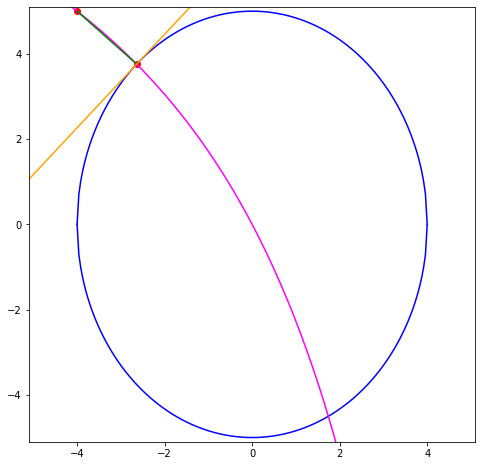

In [8]:
draw_figure(4,5,-4,5)

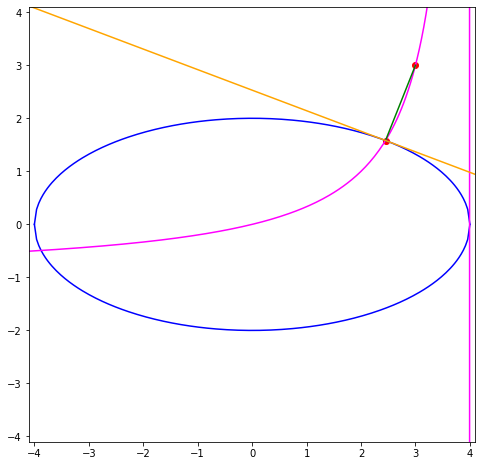

In [9]:
draw_figure(4,2,3,3)

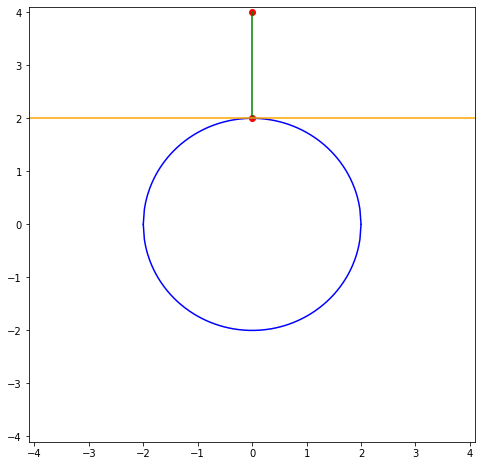

In [10]:
draw_figure(2,2,0,4)

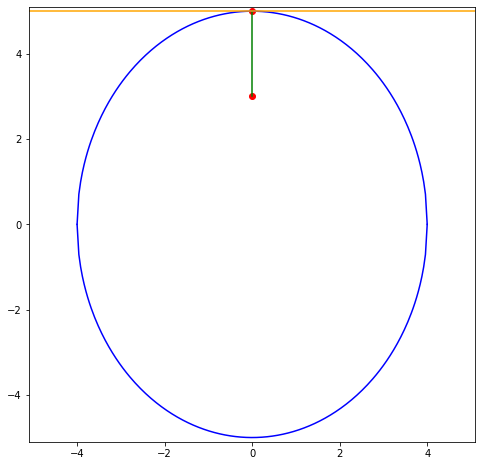

In [11]:
draw_figure(4,5,0,3)

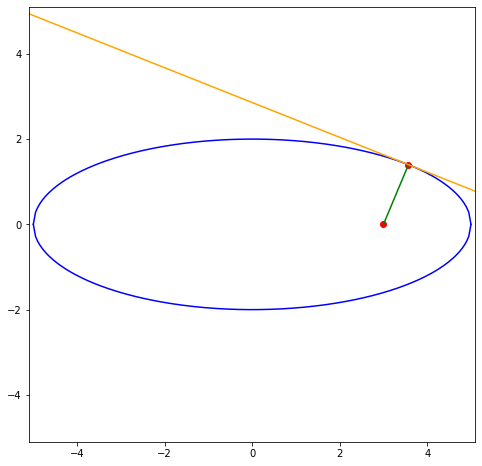

In [12]:
draw_figure(5,2,3,0)

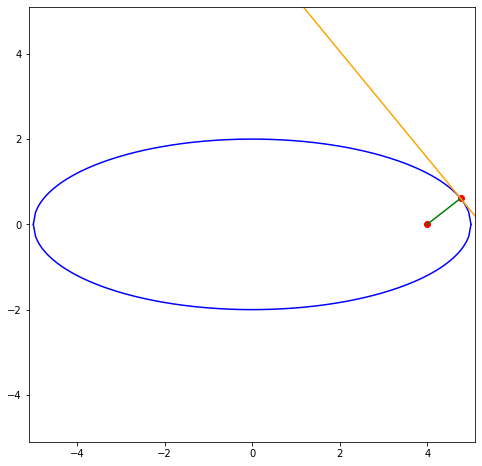

In [13]:
draw_figure(5,2,4,0)

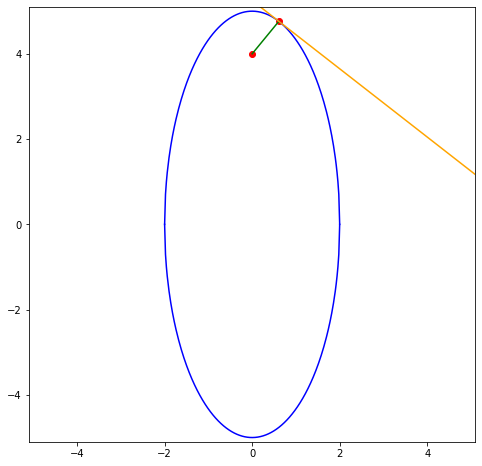

In [14]:
draw_figure(2,5,0,4)

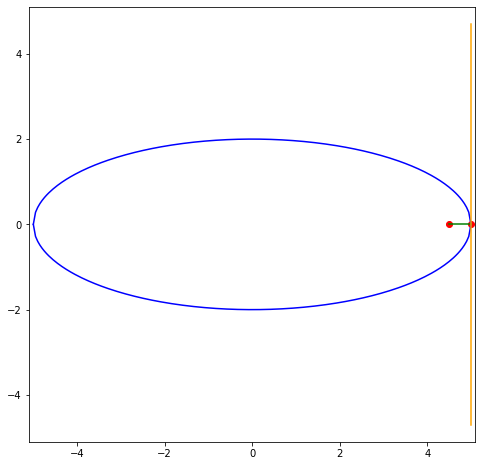

In [15]:
draw_figure(5,2,4.5,0)

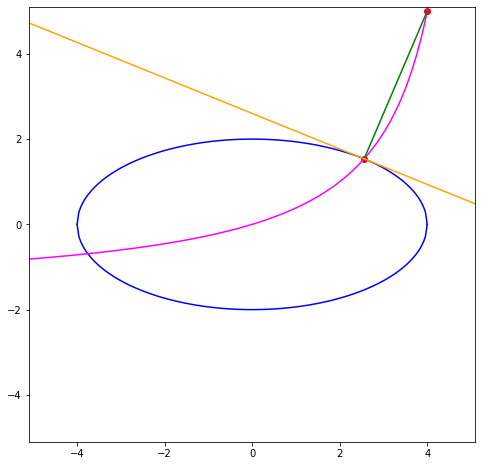

In [16]:
draw_figure(4,2,4,5)

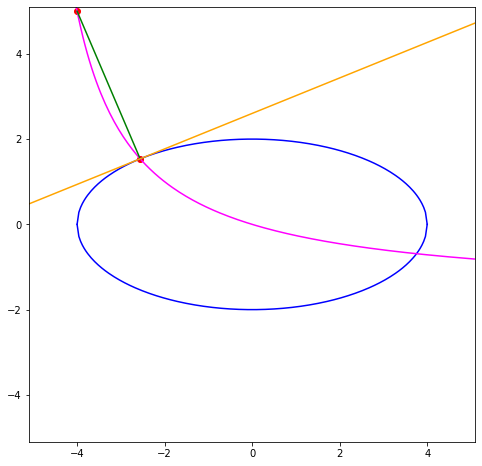

In [17]:
draw_figure(4,2,-4,5)

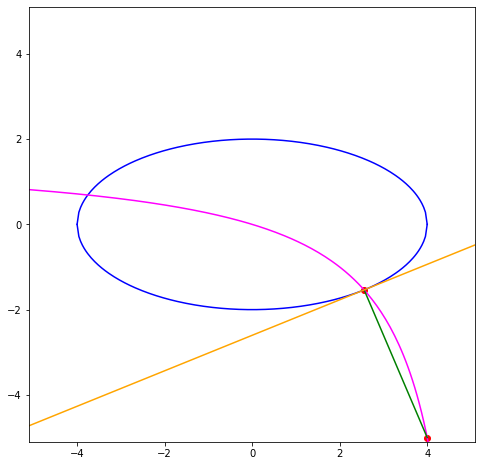

In [18]:
draw_figure(4,2,4,-5)

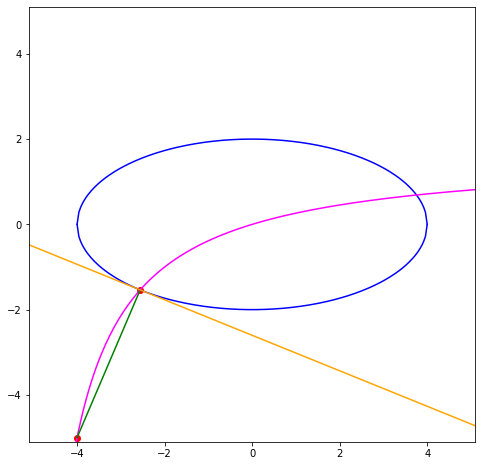

In [19]:
draw_figure(4,2,-4,-5)

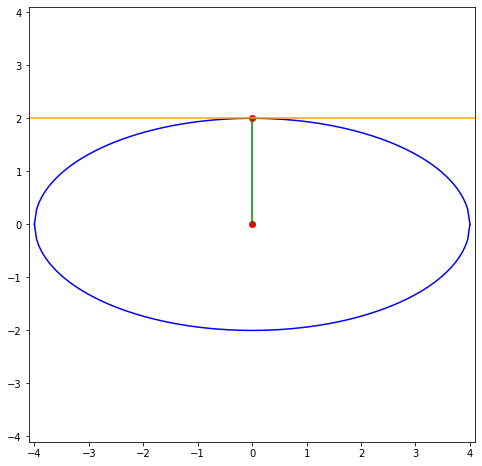

In [20]:
draw_figure(4,2,0,0)

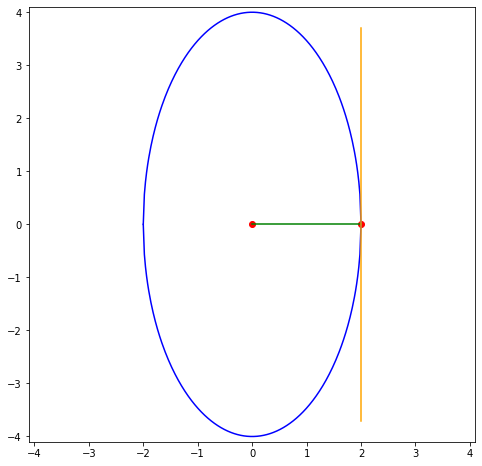

In [21]:
draw_figure(2,4,0,0)

# ЗАДАЧА 2: Минимальное расстояние от точки $(x_0, y_0)$ до любого эллипса с центром в $(\alpha,\beta)$

In [22]:
def distance_to_real_ellipse(a,b,alpha,beta,x0,y0):
    return minimal_distance_to_ellipse(a,b,x0-alpha,y0-beta)

In [23]:
# Результат должен быть 2 так как центр взяли и смотрим на ответ....... всё круто!!
distance_to_real_ellipse(4,2,4,5,4,5)

2.0

In [25]:
distance_to_real_ellipse(4,2,4,5,0,0)

3.7506931768594387

In [26]:
distance_to_real_ellipse(4,2,4,5,8,5) # Точка находится на эллипсе

0.0

# Задача 3: Находим точку заданной прямой $y = m*x+k$, или $$  минимизирующую сумму расстояний до $N$ заданных эллипсов. 

In [27]:
def non_vertical_straight_line(m,k,x):
    return m*x+k

In [ ]:
# Область где будем искать точку
def sum_of_distances_to_ellipses(parameters_list,m,k,vertical=False)

In [29]:
for a,b in [(1,2),(3,4),(5,6)]:
    print(a,b)

1 2
3 4
5 6


In [31]:
True  False

True

# Training part !!!

In [16]:
search_in_whole_plan(4,5,-4,5)

b=5 > a=4 x0=4.0 y0=5
a_notless_than_b
b=4 a=5 x0=5 y0=4.0
x0>0 and y0>0
x_begin=0 x_end=5
Iteration 1 Ellipse value: 3.4641016151377544 Normal: 1.5609756097560976
Iteration 2 Ellipse value: 2.6457513110645907 Normal: 2.6301369863013697
Iteration 3 Ellipse value: 1.9364916731037085 Normal: 3.27007299270073
Iteration 4 Ellipse value: 2.331844763272204 Normal: 2.939929328621908
Iteration 5 Ellipse value: 2.496873044429772 Normal: 2.782608695652174
Iteration 6 Ellipse value: 2.5731486062798625 Normal: 2.7057808455565144
Iteration 7 Ellipse value: 2.6098895450765727 Normal: 2.6678126342930812
Iteration 8 Ellipse value: 2.6279280544518335 Normal: 2.648938451640575
Iteration 9 Ellipse value: 2.63686631531516 Normal: 2.6395286555972146
Iteration 10 Ellipse value: 2.641315437658088 Normal: 2.63483055838107
Iteration 11 Ellipse value: 2.6390925367869555 Normal: 2.637179040938178
Iteration 12 Ellipse value: 2.6379798416512767 Normal: 2.6383537067037985
Iteration 13 Ellipse value: 2.6385362930534

(-2.638161635000009, 3.7583455443382263)

In [15]:
a_notless_than_b(4,5,7,8)

a_notless_than_b
b=5 a=4 x0=7 y0=8
x0>0 and y0>0
x_begin=0 x_end=4
Iteration 1 Ellipse value: 4.330127018922193 Normal: 3.076923076923077
Iteration 2 Ellipse value: 3.307189138830738 Normal: 4.316546762589928
Iteration 3 Ellipse value: 3.9031237489989987 Normal: 3.717472118959108
Iteration 4 Ellipse value: 3.6309218870694533 Normal: 4.021937842778794
Iteration 5 Ellipse value: 3.7727176461405114 Normal: 3.870967741935484
Iteration 6 Ellipse value: 3.8392694922830044 Normal: 3.7945395650161964
Iteration 7 Ellipse value: 3.806339477088683 Normal: 3.8328330639575157
Iteration 8 Ellipse value: 3.8228898354956478 Normal: 3.8137062290535075
Iteration 9 Ellipse value: 3.814636132322647 Normal: 3.8232746173837713
Iteration 10 Ellipse value: 3.8187683354763244 Normal: 3.8184916669073683
Iteration 11 Ellipse value: 3.816703573961899 Normal: 3.8208834529465276
Iteration 12 Ellipse value: 3.817736289462801 Normal: 3.819687637642336
Iteration 13 Ellipse value: 3.8182523961215473 Normal: 3.819089671

(2.582152843475342, 3.818639870124777)

In [19]:
ellipse_point_distance(4,5,4,5)

b=5 > a=4 x0=4 y0=5
a_notless_than_b
b=4 a=5 x0=5 y0=4
x0>0 and y0>0
x_begin=0 x_end=5
Iteration 1 Ellipse value: 3.4641016151377544 Normal: 1.5609756097560976
Iteration 2 Ellipse value: 2.6457513110645907 Normal: 2.6301369863013697
Iteration 3 Ellipse value: 1.9364916731037085 Normal: 3.27007299270073
Iteration 4 Ellipse value: 2.331844763272204 Normal: 2.939929328621908
Iteration 5 Ellipse value: 2.496873044429772 Normal: 2.782608695652174
Iteration 6 Ellipse value: 2.5731486062798625 Normal: 2.7057808455565144
Iteration 7 Ellipse value: 2.6098895450765727 Normal: 2.6678126342930812
Iteration 8 Ellipse value: 2.6279280544518335 Normal: 2.648938451640575
Iteration 9 Ellipse value: 2.63686631531516 Normal: 2.6395286555972146
Iteration 10 Ellipse value: 2.641315437658088 Normal: 2.63483055838107
Iteration 11 Ellipse value: 2.6390925367869555 Normal: 2.637179040938178
Iteration 12 Ellipse value: 2.6379798416512767 Normal: 2.6383537067037985
Iteration 13 Ellipse value: 2.6385362930534293 

1.8429078977666202

Iteration 1 Ellipse value: 4.330127018922193 Normal: 3.048780487804878
Iteration 2 Ellipse value: 3.307189138830738 Normal: 4.1208791208791204
Iteration 3 Ellipse value: 3.9031237489989987 Normal: 3.61271676300578
Iteration 4 Ellipse value: 3.6309218870694533 Normal: 3.8732394366197185
Iteration 5 Ellipse value: 3.7727176461405114 Normal: 3.7446504992867333
Iteration 6 Ellipse value: 3.7033227795285413 Normal: 3.809355067328136
Iteration 7 Ellipse value: 3.7383853335823676 Normal: 3.777106292214717
Iteration 8 Ellipse value: 3.7556415084041816 Normal: 3.7609043973651417
Iteration 9 Ellipse value: 3.764201928165632 Normal: 3.752783964365256
Iteration 10 Ellipse value: 3.759927325053645 Normal: 3.756845807916648
Iteration 11 Ellipse value: 3.757785820816725 Normal: 3.758875509159303
Iteration 12 Ellipse value: 3.758856923657013 Normal: 3.757860760198119
Iteration 13 Ellipse value: 3.758321459954799 Normal: 3.7583681600899284
Iteration 14 Ellipse value: 3.758589213730702 Normal: 3.7581144

1.8429078977667528

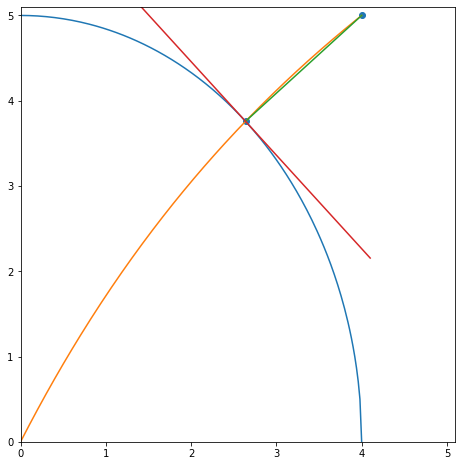

In [223]:
ellipse_point_distance(4,5,4,5)

Iteration 1 Ellipse value: 2.598075922678117 Normal: 1.5000005
Iteration 2 Ellipse value: 1.9843131998250518 Normal: 2.25000025
Iteration 3 Ellipse value: 2.3418739491590617 Normal: 1.8750003750000004
Iteration 4 Ellipse value: 2.178552836388735 Normal: 2.0625003125
Iteration 5 Ellipse value: 2.085805533746925 Normal: 2.15625028125
Iteration 6 Ellipse value: 2.1331985038747576 Normal: 2.109375296875
Iteration 7 Ellipse value: 2.109765296617479 Normal: 2.1328127890625
Iteration 8 Ellipse value: 2.1215466200115616 Normal: 2.12109404296875
Iteration 9 Ellipse value: 2.115672272848388 Normal: 2.1269534160156245
Iteration 10 Ellipse value: 2.1186135080646724 Normal: 2.1240237294921878
Iteration 11 Ellipse value: 2.1200810773373906 Normal: 2.122558886230469
Iteration 12 Ellipse value: 2.120814101736576 Normal: 2.12182646459961
Iteration 13 Ellipse value: 2.1211804241068135 Normal: 2.1214602537841802
Iteration 14 Ellipse value: 2.1213635378632802 Normal: 2.1212771483764645
Iteration 15 Ellips

4.071067811865479

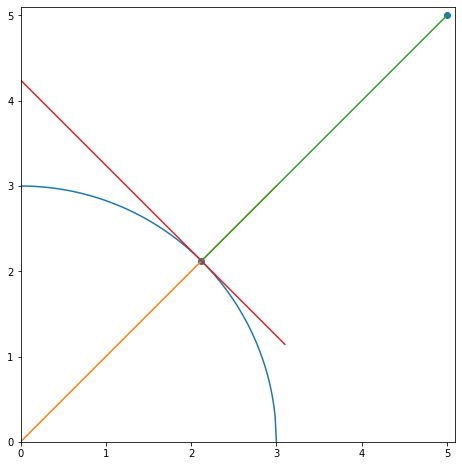

In [211]:
ellipse_point_distance(3,3,5,5)

Iteration 1 Ellipse value: 2.4494894541079755 Normal: 1.4142140623730952
Iteration 2 Ellipse value: 1.870828409913578 Normal: 2.1213205935596426
Iteration 3 Ellipse value: 2.2079399163416213 Normal: 1.7677673279663688
Iteration 4 Ellipse value: 2.0539592947914334 Normal: 1.9445439607630057
Iteration 5 Ellipse value: 1.9665162995703016 Normal: 2.0329322771613243
Iteration 6 Ellipse value: 2.0111988201535 Normal: 1.9887381189621651
Iteration 7 Ellipse value: 1.9891057805546655 Normal: 2.010835198061745
Iteration 8 Ellipse value: 2.000213318733177 Normal: 1.999786658511955
Iteration 9 Ellipse value: 1.994674931133726 Normal: 2.0053109282868498
Iteration 10 Ellipse value: 1.9974479542793095 Normal: 2.002548793399402
Iteration 11 Ellipse value: 1.9988315918539459 Normal: 2.0011677259556784
Iteration 12 Ellipse value: 1.9995226938827946 Normal: 2.0004771922338165
Iteration 13 Ellipse value: 1.9998680659243886 Normal: 2.0001319253728855
Iteration 14 Ellipse value: 2.000040707229024 Normal: 1.

1.2738861917228653e-07

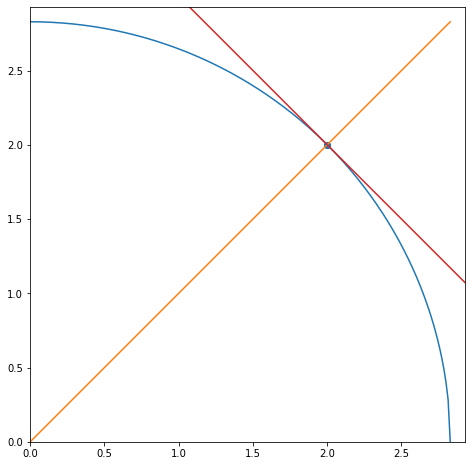

In [212]:
ellipse_point_distance(np.sqrt(8),np.sqrt(8),2,2)

Iteration 1 Ellipse value: 4.330127018922193 Normal: 3.048780487804878
Iteration 2 Ellipse value: 4.841229182759271 Normal: 1.7123287671232876
Iteration 3 Ellipse value: 4.960783708246107 Normal: 0.9124087591240876
Iteration 4 Ellipse value: 4.9902248195847845 Normal: 0.4716981132075472
Iteration 5 Ellipse value: 4.997557997412336 Normal: 0.2399232245681382
Iteration 6 Ellipse value: 4.999389611180049 Normal: 0.12100677637947725
Iteration 7 Ellipse value: 4.9998474097809975 Normal: 0.060768108896451144
Iteration 8 Ellipse value: 4.999961852881824 Normal: 0.030450669914738125
Iteration 9 Ellipse value: 4.999990463247741 Normal: 0.015242043653213022
Iteration 10 Ellipse value: 4.9999976158136406 Normal: 0.007625205880558775
Iteration 11 Ellipse value: 4.999999403953517 Normal: 0.003813649815419349
Iteration 12 Ellipse value: 4.999999850988386 Normal: 0.0019070867343046762
Iteration 13 Ellipse value: 4.999999962747097 Normal: 0.0009536088372838169
Iteration 14 Ellipse value: 4.99999999068

3.999999523162842

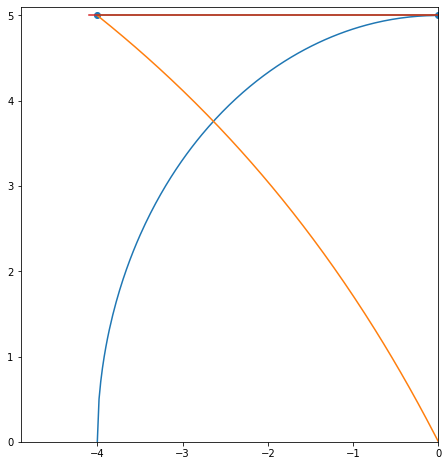

In [ ]:
def draw_figure():
    fig, ax = plt.subplots(figsize=(8,8))
    xx = np.linspace(x_begin,x_end,200)
    ax.plot(xx,ellipse_value(xx))
    ax.plot(xx,normal_value(xx))
    
    axlim = max(a,b,abs(x0),abs(y0))+0.1
    if x0>0:
        ax.set_xlim(0,axlim)
        if y0>0:
            ax.set_ylim(0,axlim)
        elif y0<0:
            ax.set_ylim((-1.0)*axlim,0)
        else:
            ax.set_ylim(-axlim,axlim)
            if x0>=a:
                #do somethhing
            else:
                #do
    elif x0<0:
        ax.set_xlim((-1.0)*axlim,0)
        if y0>0:
            ax.set_xlim(0,axlim)
        elif y0<0:
            ax.set_ylim((-1.0)*axlim,0)
        else:
            ax.set_ylim(-axlim,axlim)
            if x0<=-a:
                #outside the ellippse
            else:
                #inside the
    else:
        ax.xlim(-axlim,axlim)
        ax.ylim(-axlim,axlim)
        if y0>=b:
            x1 = 0
        elif 0<y0 & y0<b:
            x1 = ####
        elif y0==0:
            if a<=b:
                x1 = a
            else:
                x1 = 0
        elif -b<y0 & y0<0:
            x1 = ellipse
        else:
            x1 = 0
            y1 = -b
    
    ax.set_ylim(0,max(a,b,y0,)+0.1)
    ax.set_aspect('equal')
    
       
    y_approximation = ellipse_value(x_approximation)
    
    x_values = [x_approximation,x0]
    y_values = [y_approximation,y0]
    ax.scatter(x_values,y_values)
    ax.plot(x_values,y_values)
    
    xx = np.linspace(0,a+0.1,2) if x0>0 else np.linspace(-(a+0.1),0,2)
    ax.plot(xx,tangent(xx,x_approximation,y_approximation))
    

In [123]:
#Метод Ньютона для нахождения х1
def closest_point(x0,y0,alpha=0,beta=0,a=1,b=1,eps=1e-6,plt=plt):
    def ellipse_value(x):
        return ((x-alpha)**4 - (a**2) * (x-alpha)**2)*((x0-alpha)*a**2 + (x-alpha)*(b**2 - a**2))**2 + (a*b*(y0-beta))**2
    
    xx = np.linspace(-a-x0-1,a+x0+1,100)
    plt.plot(xx,res_f(xx))
    plt.plot(xx,0*xx,'r-')
    
    """
    x = -a
    
    h = 0.0001 # прирашение дифференцирования
    df = (res_f(x+h) - res_f(x))/h # первая производная
            
    i = 1
    while np.abs(res_f(x))> eps :
        print("Iteration: ",i," function: ",res_f(x))
        x = x - res_f(x)/df
        
        df = (res_f(x+h) - res_f(x))/h # первая производная
        i += 1
        
    print("zero_f(x): ",x," f(x): ",res_f(x))
    
    return x
    
    """

In [104]:
def dmin(x0,y0,alpha=0,beta=0,a=1,b=1):
    x1 = closest_point(x0,y0,alpha,beta,a,b)
    y1 = beta + ((y0-beta)*(b**2))/((a**2)*((x0-alpha)/(x1-alpha)) + b**2 - a**2)
    
    return np.sqrt((x0-x1)**2 + (y0-y1)**2)

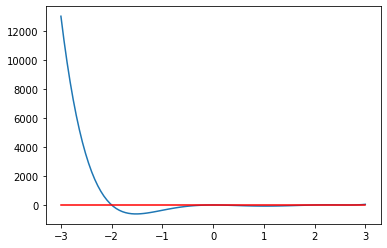

In [118]:
closest_point(x0=2,y0=2,a=2,b=1)

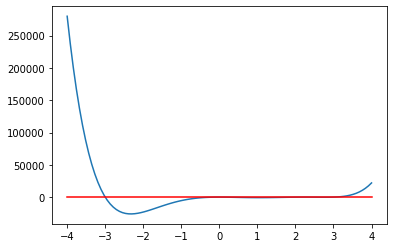

In [119]:
closest_point(x0=2,y0=2,a=3,b=1)

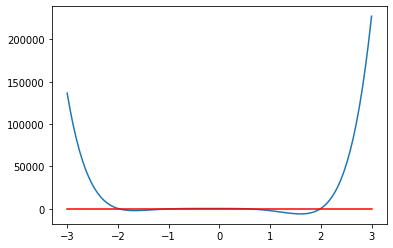

In [120]:
closest_point(x0=2,y0=2,a=2,b=5)

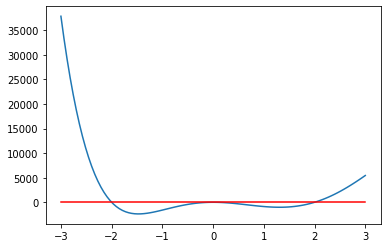

In [121]:
closest_point(x0=5,y0=2,a=2,b=1)

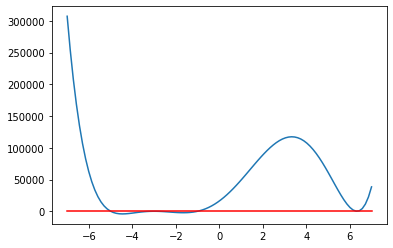

In [124]:
closest_point(x0=4,y0=1,a=2,b=1,alpha=-3,beta=5)